In [2]:
# page7

import numpy as np

x = [1,2,3,4,5]

def l1_norm(x):
  x_norm = 0
  for xi in x:
    x_norm += np.abs(xi)

  return x_norm

def l2_norm(x):
  x_norm = 0
  for xi in x:
    x_norm += xi*xi

  return np.sqrt(x_norm)

print("x=", x)
print("L1 norm=", l1_norm(x))
print("L2 norm=", l2_norm(x))

x= [1, 2, 3, 4, 5]
L1 norm= 15
L2 norm= 7.416198487095663


In [23]:
# page28
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}
my_pred = None
my_actual = None
my_name = None

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive',
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray',
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(11, 8))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global my_predictions, colors, my_pred, my_actual, my_name

    my_name = name_
    my_pred = pred
    my_actual = actual

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)

    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10

    length = len(df) / 2

    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mse'], height=0.3)

    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')

    plt.title('MSE Error', fontsize=16)
    plt.xlim(min_, max_)

    plt.show()

def add_model(name_, pred, actual):
    global my_predictions, my_pred, my_actual, my_name
    my_name = name_
    my_pred = pred
    my_actual = actual

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

def plot_all():
    global my_predictions, my_pred, my_actual, my_name

    plot_predictions(my_name, my_pred, my_actual)

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)

    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10

    length = len(df) / 2

    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mse'], height=0.3)

    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 6)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')

    plt.title('MSE Error', fontsize=16)
    plt.xlim(min_, max_)

    plt.show()


In [15]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing()
data, target = california_housing.data, california_housing.target

#print(dir(california_housing))

df = pd.DataFrame(california_housing['data'], columns=california_housing['feature_names'])
df['target'] = california_housing['target']

print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [18]:
from sklearn.model_selection import train_test_split

# 시드 설정
SEED=30

# 코드를 입력해 주세요
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['target']), df['target'], random_state=SEED)

# 코드를 입력해 주세요
print(x_train.shape)
print(x_test.shape)

# 검증코드
print(x_train.head())


(15480, 8)
(5160, 8)
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
4095   5.0754      44.0  5.196281   1.053719       967.0  1.997934     34.15   
6797   2.9405      24.0  3.767588   0.987437      2937.0  3.689698     34.08   
1205   2.2813      21.0  5.207273   1.032727       862.0  3.134545     39.42   
20319  3.6500      15.0  4.679577   0.992958      1001.0  3.524648     34.25   
17676  3.6953      14.0  4.148308   1.107271      3979.0  2.864651     37.32   

       Longitude  
4095     -118.40  
6797     -118.14  
1205     -121.71  
20319    -119.17  
17676    -121.84  


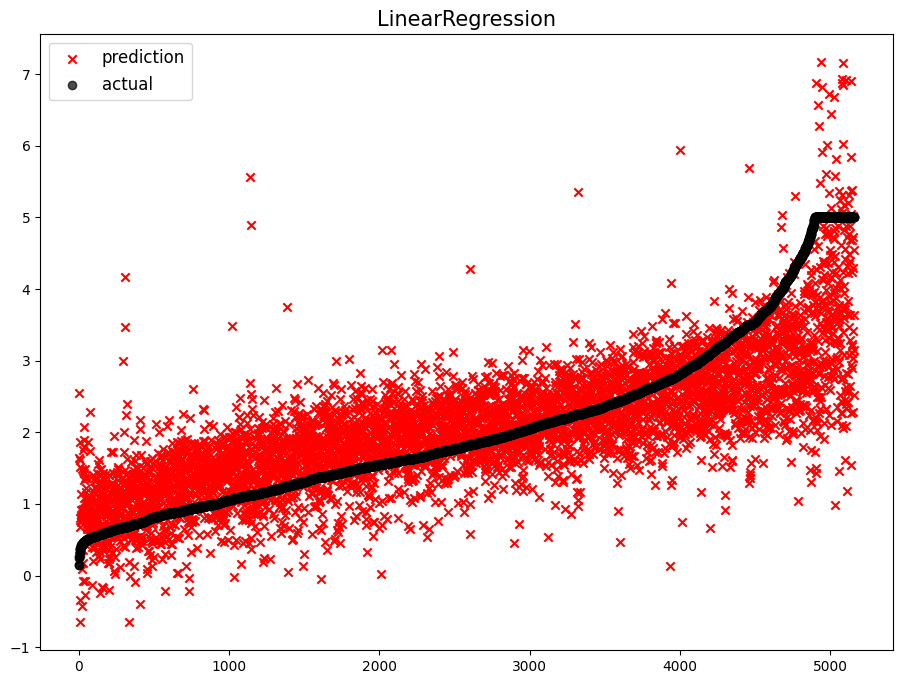

              model       mse
0  LinearRegression  0.565802


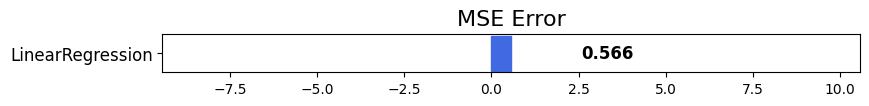

In [24]:
from sklearn.linear_model import LinearRegression

# 코드를 입력해 주세요
model = LinearRegression()

# 코드를 입력해 주세요
model.fit(x_train, y_train)

# 코드를 입력해 주세요
pred = model.predict(x_test)

mse_eval('LinearRegression', pred, y_test)



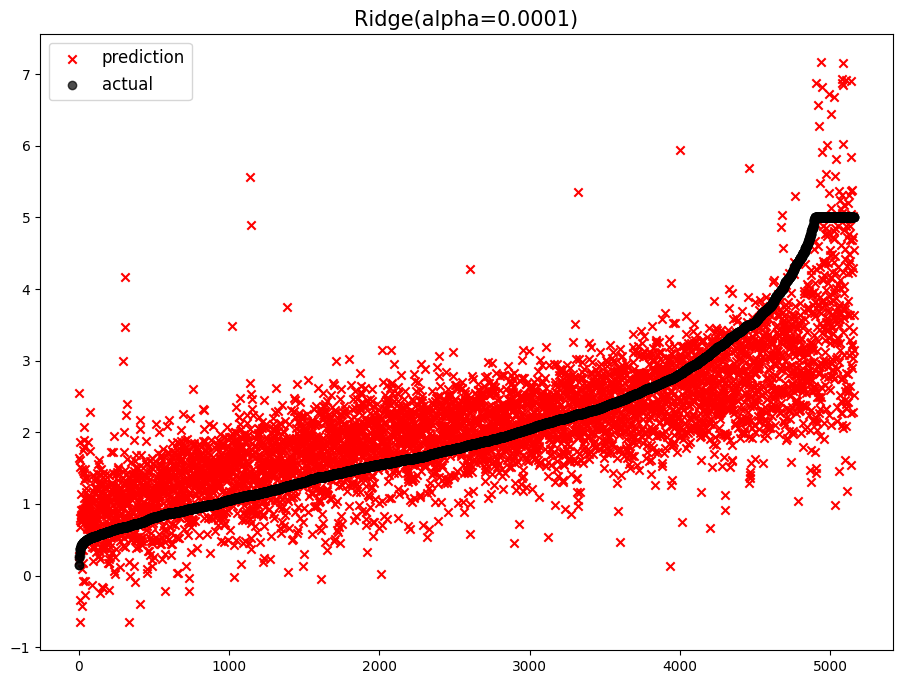

                 model       mse
0     Ridge(alpha=100)  0.566414
1      Ridge(alpha=10)  0.565823
2       Ridge(alpha=1)  0.565803
3     Ridge(alpha=0.1)  0.565802
4    Ridge(alpha=0.01)  0.565802
5   Ridge(alpha=0.001)  0.565802
6  Ridge(alpha=0.0001)  0.565802
7     LinearRegression  0.565802


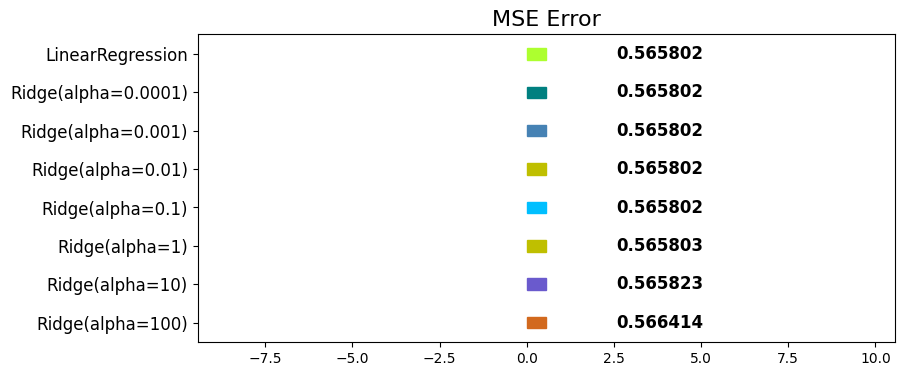

In [25]:
# page30

# 값이 커질 수록 큰 규제입니다.
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

for alpha in alphas:
    # 코드를 입력해 주세요
    ridge = Ridge(alpha=alpha, random_state=SEED)
    ridge.fit(x_train, y_train)
    pred = ridge.predict(x_test)
    add_model('Ridge(alpha={})'.format(alpha), pred, y_test)
plot_all()


In [26]:
# paeg31

x_train.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [27]:
# page31

ridge.coef_

array([ 0.437,  0.01 , -0.111,  0.65 , -0.   , -0.003, -0.413, -0.425])

In [28]:
# page32

# 코드를 입력해 주세요
pd.DataFrame(list(zip(x_train.columns, ridge.coef_)), columns=['features', 'importances']).sort_values('importances')


,features,importances
7,Longitude,-0.424740
6,Latitude,-0.413341
2,AveRooms,-0.111156
5,AveOccup,-0.003325
4,Population,-0.000005
1,HouseAge,0.009555
0,MedInc,0.437350
3,AveBedrms,0.649911


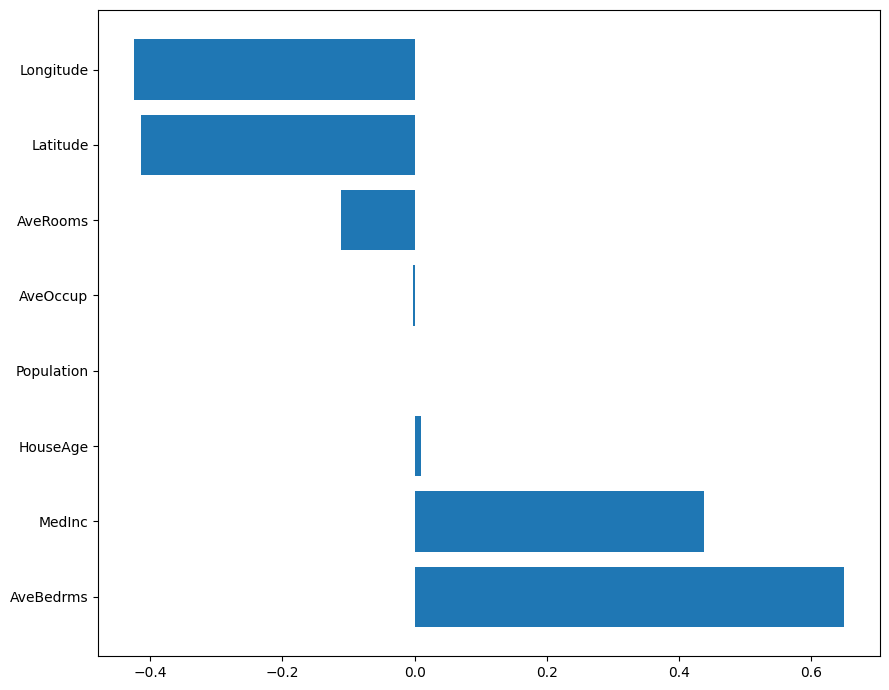

In [30]:
# page33

def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)

    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

plot_coef(x_train.columns, ridge.coef_)

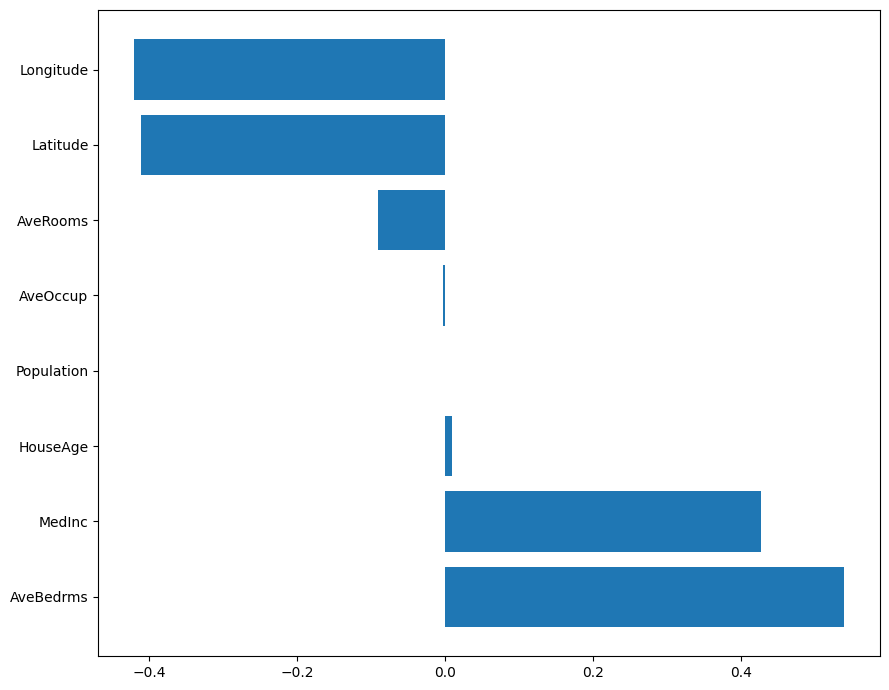

In [31]:
# page34

ridge_100 = Ridge(alpha=100)
ridge_100.fit(x_train, y_train)
ridge_pred_100 = ridge_100.predict(x_test)

ridge_001 = Ridge(alpha=0.001)
ridge_001.fit(x_train, y_train)
ridge_pred_001 = ridge_001.predict(x_test)

plot_coef(x_train.columns, ridge_100.coef_)



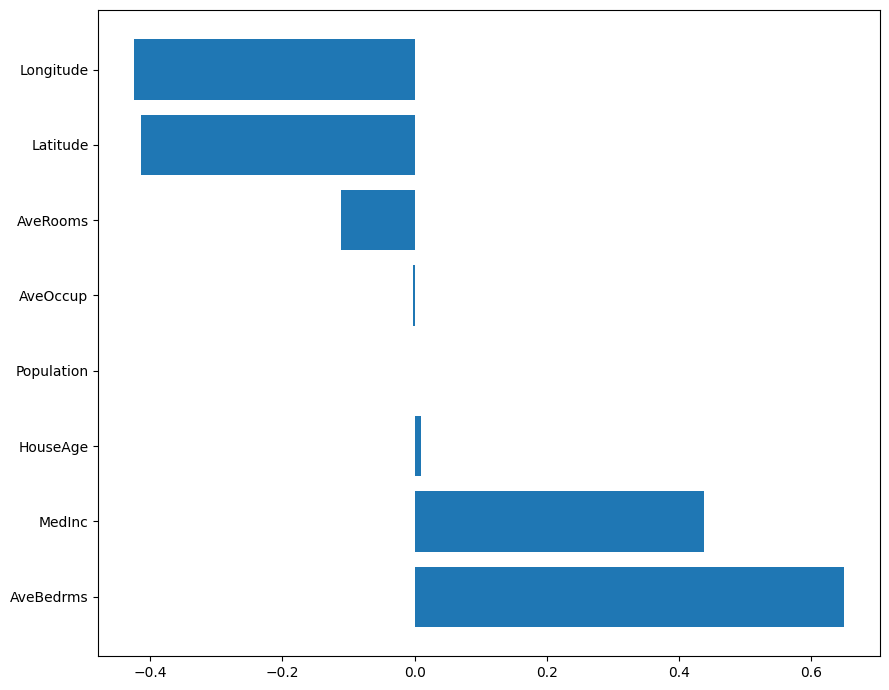

In [39]:
# page36

plot_coef(x_train.columns, ridge_001.coef_)


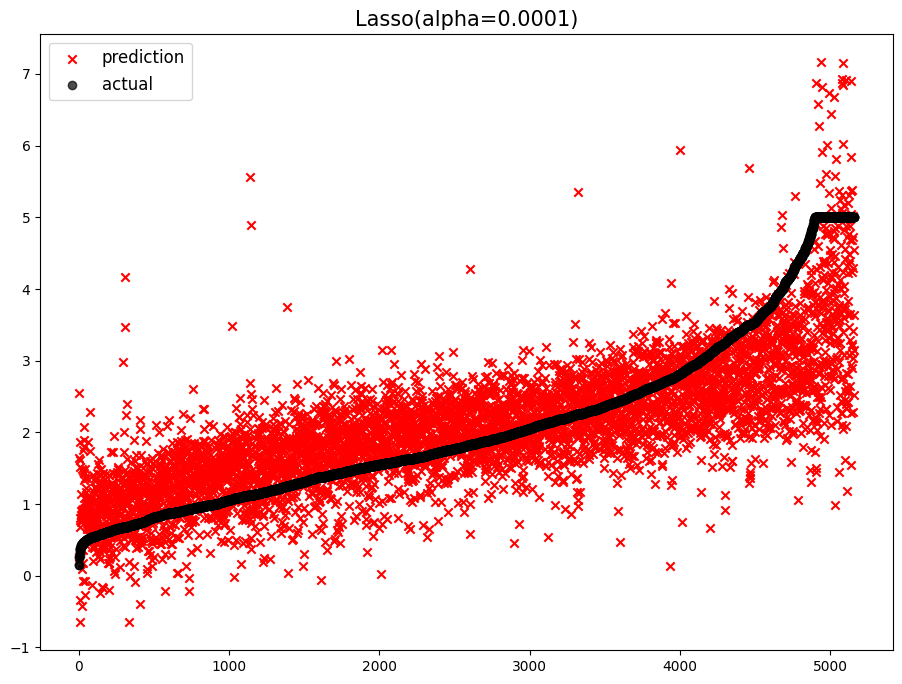

                  model       mse
0       Lasso(alpha=10)  1.385873
1      Lasso(alpha=100)  1.385766
2        Lasso(alpha=1)  1.009197
3      Lasso(alpha=0.1)  0.658980
4     Lasso(alpha=0.01)  0.571219
5      Ridge(alpha=100)  0.566414
6    Lasso(alpha=0.001)  0.565912
7       Ridge(alpha=10)  0.565823
8   Lasso(alpha=0.0001)  0.565809
9        Ridge(alpha=1)  0.565803
10     Ridge(alpha=0.1)  0.565802
11    Ridge(alpha=0.01)  0.565802
12   Ridge(alpha=0.001)  0.565802
13  Ridge(alpha=0.0001)  0.565802
14     LinearRegression  0.565802


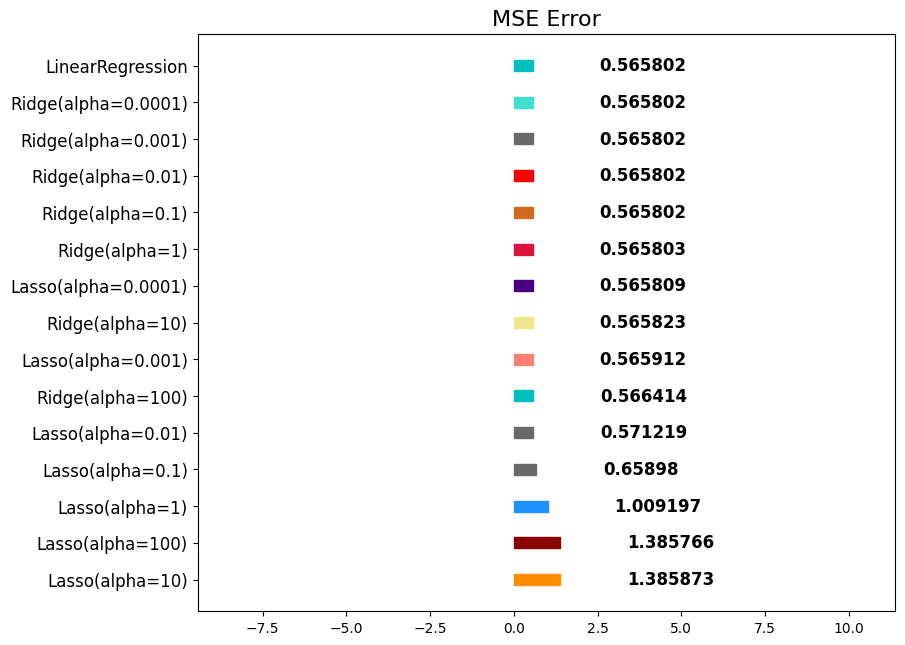

In [33]:
# page37~39

from sklearn.linear_model import Lasso

# 값이 커질 수록 큰 규제입니다.
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

for alpha in alphas:
    # 코드를 입력해 주세요
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    pred = lasso.predict(x_test)
    add_model('Lasso(alpha={})'.format(alpha), pred, y_test)
plot_all()


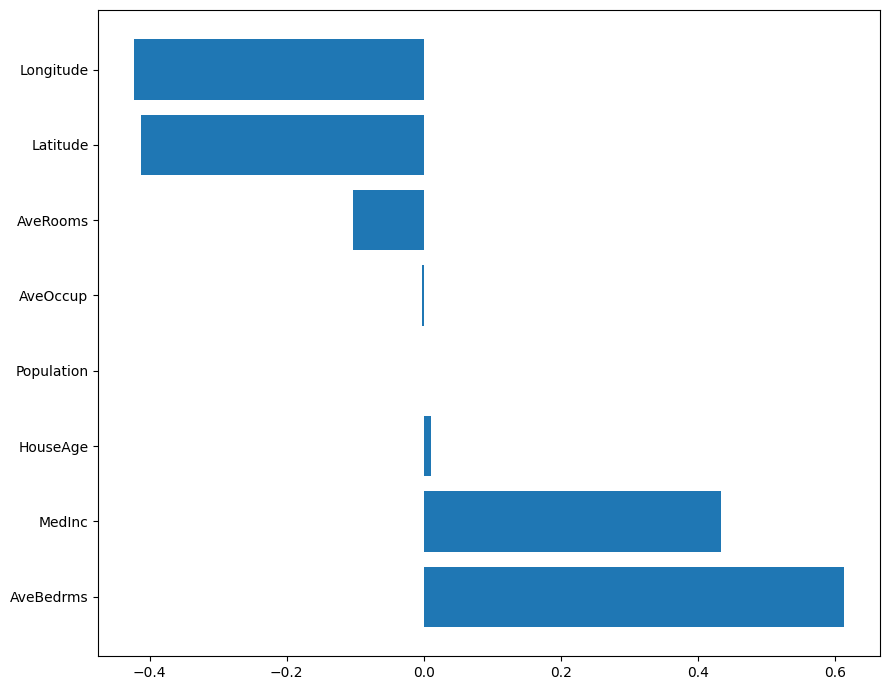

In [35]:
# page40

lasso_100 = Lasso(alpha=100)
lasso_100.fit(x_train, y_train)
lasso_pred_100 = lasso_100.predict(x_test)

lasso_001 = Lasso(alpha=0.001)
lasso_001.fit(x_train, y_train)
lasso_pred_001 = lasso_001.predict(x_test)

plot_coef(x_train.columns, lasso_001.coef_)



In [36]:
# page42

lasso_001.coef_


array([ 0.434,  0.01 , -0.104,  0.613, -0.   , -0.003, -0.412, -0.423])

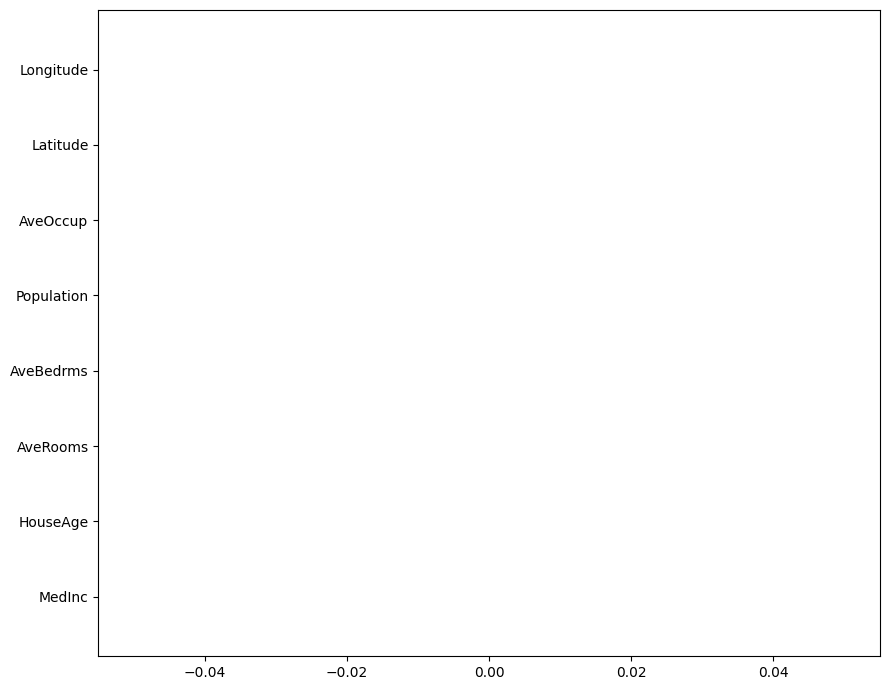

In [37]:
# page43

plot_coef(x_train.columns, lasso_100.coef_)


In [38]:
# page44

lasso_100.coef_


array([ 0.,  0.,  0., -0., -0., -0., -0., -0.])

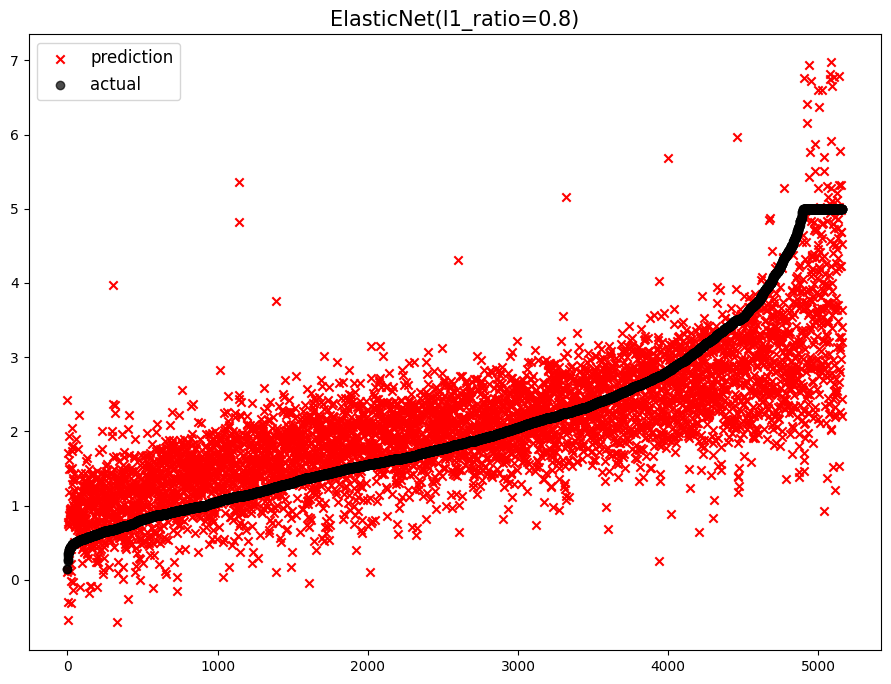

                       model       mse
0            Lasso(alpha=10)  1.385873
1           Lasso(alpha=100)  1.385766
2             Lasso(alpha=1)  1.009197
3           Lasso(alpha=0.1)  0.658980
4          Lasso(alpha=0.01)  0.571219
5   ElasticNet(l1_ratio=0.8)  0.569931
6   ElasticNet(l1_ratio=0.5)  0.568493
7   ElasticNet(l1_ratio=0.2)  0.567482
8           Ridge(alpha=100)  0.566414
9         Lasso(alpha=0.001)  0.565912
10           Ridge(alpha=10)  0.565823
11       Lasso(alpha=0.0001)  0.565809
12            Ridge(alpha=1)  0.565803
13          Ridge(alpha=0.1)  0.565802
14         Ridge(alpha=0.01)  0.565802
15        Ridge(alpha=0.001)  0.565802
16       Ridge(alpha=0.0001)  0.565802
17          LinearRegression  0.565802


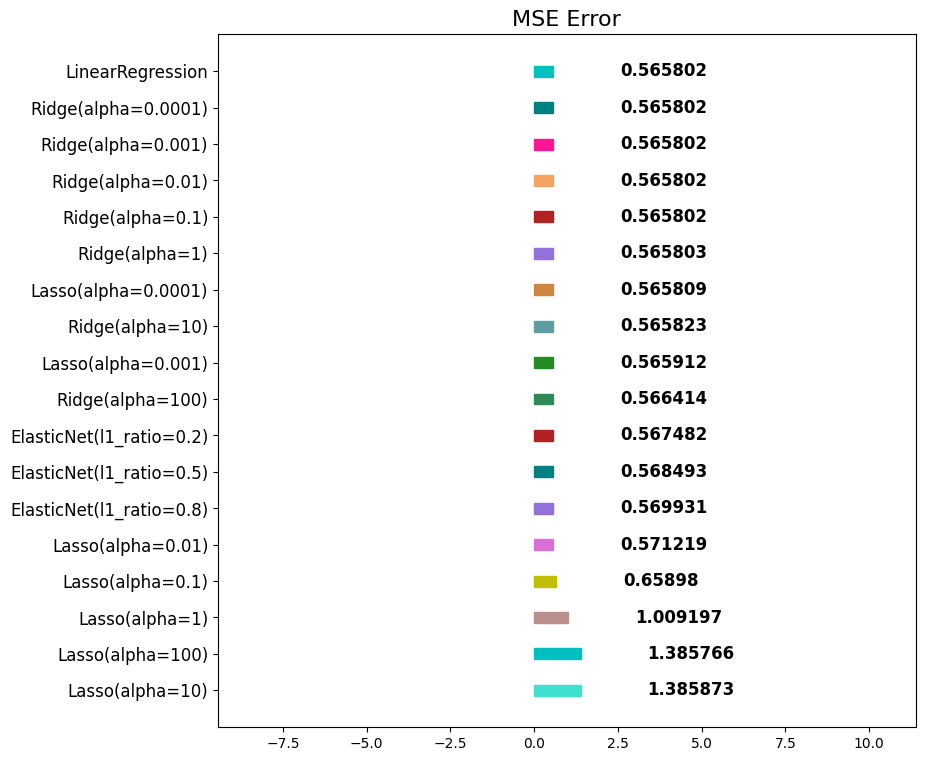

In [40]:
# page46

from sklearn.linear_model import ElasticNet

alpha=0.01
ratios = [0.2, 0.5, 0.8]

for ratio in ratios:
    # 코드를 입력해 주세요
    elasticnet = ElasticNet(alpha=alpha, l1_ratio=ratio, random_state=SEED)
    elasticnet.fit(x_train, y_train)
    pred = elasticnet.predict(x_test)
    add_model('ElasticNet(l1_ratio={})'.format(ratio), pred, y_test)
plot_all()


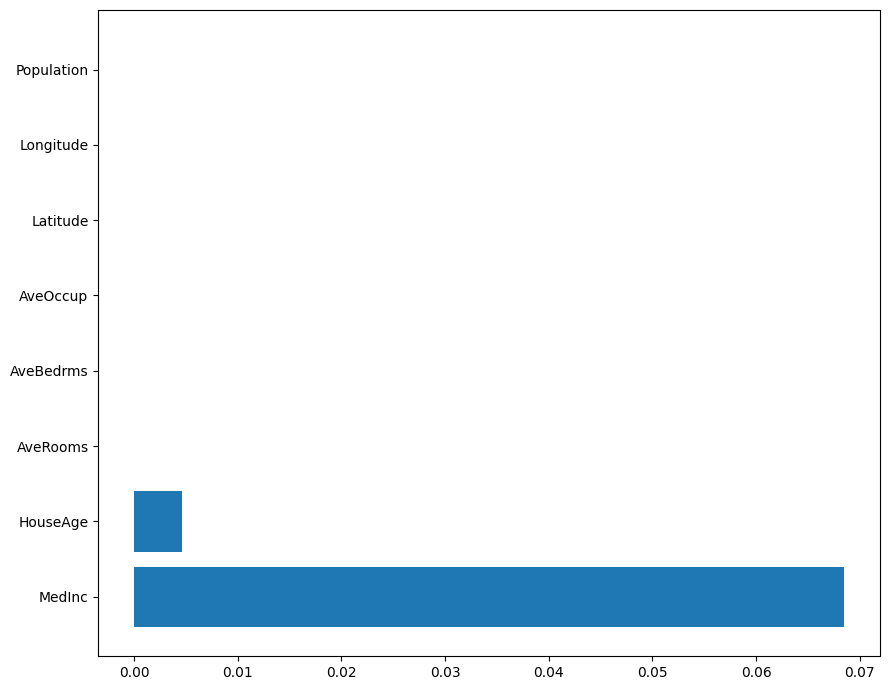

In [41]:
# page48

elsticnet_20 = ElasticNet(alpha=5, l1_ratio=0.2)
elsticnet_20.fit(x_train, y_train)
elasticnet_pred_20 = elsticnet_20.predict(x_test)

elsticnet_80 = ElasticNet(alpha=5, l1_ratio=0.8)
elsticnet_80.fit(x_train, y_train)
elasticnet_pred_80 = elsticnet_80.predict(x_test)

plot_coef(x_train.columns, elsticnet_20.coef_)


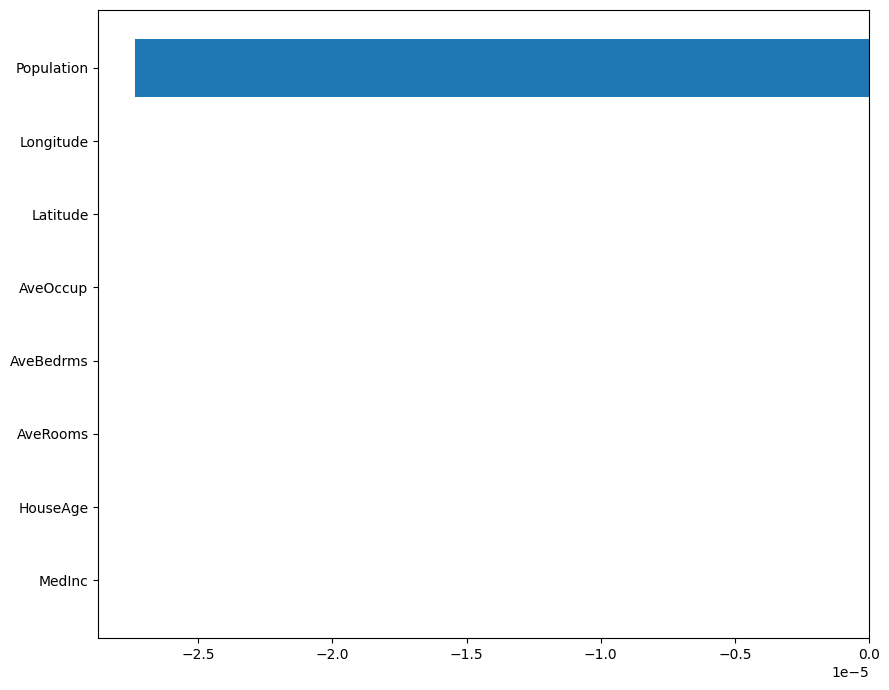

In [42]:
# page50

plot_coef(x_train.columns, elsticnet_80.coef_)


In [43]:
# page51

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 코드를 입력해 주세요
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(x_train)

# 코드검증
round(pd.DataFrame(minmax_scaled).describe(), 2)


,0,1,2,3,4,5,6,7
count,15480.00,15480.00,15480.00,15480.00,15480.00,15480.00,15480.00,15480.00
mean,0.23,0.54,0.03,0.02,0.05,0.00,0.33,0.48
std,0.13,0.25,0.02,0.01,0.04,0.01,0.23,0.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.14,0.33,0.03,0.02,0.03,0.00,0.15,0.25
50%,0.21,0.55,0.03,0.02,0.04,0.00,0.18,0.58
75%,0.29,0.71,0.04,0.02,0.06,0.00,0.55,0.63
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


from matplotlib import pyplot as plt
_df_12[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13[1].plot(kind='hist', bins=20, title=1)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14[2].plot(kind='hist', bins=20, title=2)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15[3].plot(kind='hist', bins=20, title=3)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x=0, y=1, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x=1, y=2, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18.plot(kind='scatter', x=2, y=3, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x=3, y=4, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_21[1].plot(kind='line', figsize=(8, 4), title=1)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_22[2].plot(kind='line', figsize=(8, 4), title=2)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_23[3].plot(kind='line', figsize=(8, 4), title=3)
plt.gca().spines[['top', 'right']].set_visible(False)

In [44]:
# page55

std_scaler = StandardScaler()

std_scaled = std_scaler.fit_transform(x_train)

round(pd.DataFrame(std_scaled).describe(), 2)


,0,1,2,3,4,5,6,7
count,15480.00,15480.00,15480.00,15480.00,15480.00,15480.00,15480.00,15480.00
mean,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.77,-2.19,-1.77,-1.46,-1.27,-0.20,-1.44,-2.39
25%,-0.69,-0.84,-0.38,-0.18,-0.57,-0.06,-0.80,-1.11
50%,-0.18,0.03,-0.08,-0.10,-0.23,-0.02,-0.65,0.54
75%,0.46,0.66,0.24,0.01,0.26,0.01,0.98,0.78
max,5.84,1.85,53.24,66.47,24.04,103.57,2.97,2.62


from matplotlib import pyplot as plt
_df_0[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1[1].plot(kind='hist', bins=20, title=1)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2[2].plot(kind='hist', bins=20, title=2)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3[3].plot(kind='hist', bins=20, title=3)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x=0, y=1, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x=1, y=2, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x=2, y=3, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x=3, y=4, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9[1].plot(kind='line', figsize=(8, 4), title=1)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10[2].plot(kind='line', figsize=(8, 4), title=2)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11[3].plot(kind='line', figsize=(8, 4), title=3)
plt.gca().spines[['top', 'right']].set_visible(False)